In [1]:
%%capture
from os import getcwd
while getcwd().split('\\')[-1] != 'optimisation':
    %cd ..

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

import plotting.contour

# Boyd and Vandenberghe - Convex Optimisation
## Chapter 1 - Introduction

### Section 1.1 - Mathematical Optimisation

Boyd begins by presenting the general form of a *mathematical optimisation problem*,

| | |
| :-- | :-- |
| minimise | $f_0(x)$ |
| s.t.     | $f_i(x) \leq b_i, \quad i = 1, \dots, m$|

<div style="text-align: right">(1.1)</div>

He then gives the formal definition of a *linear program*,

$$f_i(\alpha x + \beta y) = \alpha f_i(x) + \beta f_i(y)\text{,}$$<div style="text-align: right">(1.2)</div>
and defines *non-linear programs* in the obvious manner. A *convex optimisation problem* is defined as one where the objective and constraints are convex, that is,

$$f_i(\alpha x + \beta y) \leq \alpha f_i(x) + \beta f_i(y)\text{,}$$<div style="text-align: right">(1.3)</div>

where $\alpha, \beta \in [0, 1]$ and $\alpha + \beta = 1$.

### Section 1.2 - Least-Squares and Linear Programming

#### Least Squares

An unconstrained least squares problem is a problem with no contraints (surprise!) and objective function of the form

$$f_0(x) = || Ax - b ||^2_2\text{.}$$<div style="text-align: right">(1.4)</div>
Below we import a class which can solve the least-squares minimisation problem, see the source file if you are interested. Objects created using least_squares(A, b) are callable. When called they return the squared 2-norm of Ax - b. This is used to make the contour plot showing the solution obtained.

When minimising the least squares error we do not explicitly use the solution $x^* = (A^TA)^{-1}A^Tb$ given by Boyd. Matrix inversion can be numerically unstable, and the numpy implementation in np.linalg.lstsq() avoids this issue. The details of stable numerical solution of this particular problem are not important at this moment.

In [3]:
from src.least_squares import least_squares

If we create $A \in \mathbb{R}^{k\times n}$, with $n=2$ for easier plotting, and $b \in \mathbb{R}^k$ we can solve an example of such a problem

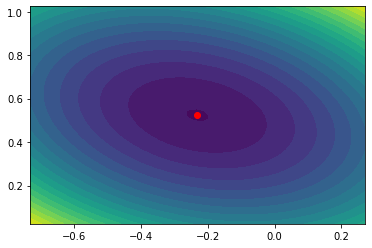

In [4]:
k, n = 10, 2
A = np.random.normal(0, 1, k*n).reshape(-1, n)
b = np.random.normal(0, 2, k).reshape(-1, 1)
f0 = least_squares(A, b)

soln = f0.solve_minimum()
xs = soln['x*']

fig, ax = plotting.contour.contourf(
    xlim=(xs[0]-0.5, xs[0]+0.5),
    ylim=(xs[1]-0.5, xs[1]+0.5),
    func=f0,
    gridpoints=51,
    ncontours=20,
)
_ = ax.scatter(xs[0], xs[1], c='red')

The least-squares problem appears in many areas; anyone who has ever done any regression, parameter estimation, or control should recognise the name. The problem has been studied in a great deal of detail and highly efficient solvers exist. Looking at the contour plot above it might come as little surprise that these problems are relatively easy to solve. Some modifications can make the method more flexible.

One of the most natural extensions is that of weighted least-squares. In weighted least-squares a weighted version of the cost function is minimised. In normal least-squares we can write $|| Ax - b ||^2_2$ as $$\sum^k_{i=1} (a_i^Tx - b_i)\text{,}$$ and a weighted version of the problem as $$\sum^k_{i=1} w_i(a_i^Tx - b_i)\text{,}$$ with $w_1, \dots, w_k \geq 0$.

*Regularisation* is another relatively common extension to least-squares problems where extra terms are added to the least-squares cost function. Boyd gives the simplest example $$\sum^k_{i=1}(a_i^Tx - b_i) + \rho\sum^k_{i=1}x_i^2\text{,}$$ which we could also write $|| Ax - b ||^2_2 + x^Tx$. Regularisation appears in statistical estimation when $x$ has a prior estimate. Regularisation can also be used as a tool to try and squeeze out acceptable solutions from an ill-posed problem or to prevent overfitting. We will cover these topics more when Boyd returns to them in Chapters 6 and 7.

#### Linear Programs

Linear programs are another very well-known class of optimisation problems. In a linear program the objective function and constraints are all linear functions of the optimisation variable.

| | |
| :-- | :-- |
| minimise | $c^Tx$ |
| s.t.     | $a_i^Tx \leq b_i, \quad i = 1, \dots, m$|

<div style="text-align: right">(1.5)</div>
Where $a_i \in \mathbb{R}^n$ and $b_i \in \mathbb{R}$, evidently we could write the constraints as $Ax \leq b$ with $A \in \mathbb{R}^{m\times n}$ and $b \in \mathbb{R^m}$. Linear programs have also been very deeply studied, and although we have no simple analytical formula for their solution there are many effective solvers for this class of problems.

Boyd chooses the *Chebyshev approximation problem* as his example of an interesting problem which can be formulated as a linear program.

| | |
| :-- | :-- |
| minimise | $\max_{i=1,\dots,k} |a_i^Tx - b_i|$ |

<div style="text-align: right">(1.6)</div>
I will offer a little bit of explanation since I had to dig a little to find out what exactly is meant by "the" Chebyshev approximation problem. Chebyshev approximation in general has to do with using Chebyshev polynomials to approximate a given function, but what Boyd refers to here is the question of determining a linear approximation $Ax$ which minimises the largest error of approximation between $Ax$ and $b$ - a Chebyshev approximation of order 1. This can be phrased as a linear program with variables $x \in \mathbb{R}^n$ and $t \in \mathbb{R}$:

| | | |
| :-- | :-- | :-- |
| minimise | $t$ | |
| s.t.     | $a_i^Tx -t \leq b_i,$ | $\quad i = 1, \dots, k$|
|          | $-a_i^Tx -t \leq -b_i,$ | $\quad i = 1, \dots, k$|

<div style="text-align: right">(1.7)</div>
More details on this can be found in my notes on linear programming, where it is solved as an example problem.

### Sections 1.3 and 1.4: Convex Optimisation and Non-Linear Optimisation

There is nothing in this section that I feel I can add significant value to, but as a key point for the rest of this series of notes and examples I want to repeat a point that Boyd makes which I believe captures the value of this area of study wonderfully: first, techniques for convex (and quasiconvex) optimisation covers a sufficiently large problem domain that a surprising number of problems can be formulated as convex optimisation problems, and second, the techniques used for convex optimisaition are general enough to be useful in non-convex problems.

I leave the details of this up to Boyd, he does a far better job in exposition than I could hop to do here. I encourage readers to not skip what he has written in the remained of Chapter 1, since some of it really is quite relevant in a holistic sense.